# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [2]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [3]:
#Specifying the url from which movie related data to be fetched
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
headers = {
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
'Accept-Language': 'en-US,en;q=0.9',
'Accept-Encoding': 'gzip, deflate, br',
'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
#Sending an HTTP GET request to the URL
response = requests.get(url,headers=headers)
#Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup = BeautifulSoup(response.text, 'html.parser')
#Printing the prettified HTML content
print(soup.prettify())



<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [4]:
# Write Your Code here
list_of_links=[]
main_web_url=r"https://www.justwatch.com"
ancher_tag= soup.find_all("a",class_="title-list-grid__item--link")
for tag in ancher_tag:
   href=tag.get("href")
   link=main_web_url+href
   list_of_links.append(link)
print(list_of_links)

['https://www.justwatch.com/in/movie/project-k', 'https://www.justwatch.com/in/movie/munjha', 'https://www.justwatch.com/in/movie/aavesham-2024', 'https://www.justwatch.com/in/movie/family-star', 'https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil', 'https://www.justwatch.com/in/movie/the-fall-guy', 'https://www.justwatch.com/in/movie/hit-man', 'https://www.justwatch.com/in/movie/godzilla-minus-one', 'https://www.justwatch.com/in/movie/inside-out', 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire', 'https://www.justwatch.com/in/movie/furiosa', 'https://www.justwatch.com/in/movie/manjummel-boys', 'https://www.justwatch.com/in/movie/laapataa-ladies', 'https://www.justwatch.com/in/movie/rockstar', 'https://www.justwatch.com/in/movie/dune-part-two', 'https://www.justwatch.com/in/movie/the-crew-2024', 'https://www.justwatch.com/in/movie/maharshi', 'https://www.justwatch.com/in/movie/maharaja-2024', 'https://www.justwatch.com/in/movie/civil-war-2024-0', 'http

## **Scrapping Movie Title**

In [5]:
# Write Your Code here
list_of_movies_titles=[]
for link in list_of_links:
  try:
    headers = {
     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
     'Accept-Language': 'en-US,en;q=0.9',
     'Accept-Encoding': 'gzip, deflate, br',
     'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    response=requests.get(link,headers=headers)
    soup=BeautifulSoup(response.text,"html.parser")
    title_tag = soup.find("h1")
    if title_tag:
      title=title_tag.text.split("(")[0].strip()
      list_of_movies_titles.append(title)
    else:
      list_of_movies_titles.append("NA")
  except Exception as e:
    print(e)

#print(len(list_of_movies_titles))
print(list_of_movies_titles)

['Kalki 2898 AD', 'Munjya', 'Aavesham', 'Family Star', 'The Gangster, the Cop, the Devil', 'The Fall Guy', 'Hit Man', 'Godzilla Minus One', 'Inside Out', 'Godzilla x Kong: The New Empire', 'Furiosa: A Mad Max Saga', 'Manjummel Boys', 'Laapataa Ladies', 'Rockstar', 'Dune: Part Two', 'Crew', 'Maharshi', 'Maharaja', 'Civil War', 'Maidaan', 'Aranmanai 4', 'Oppenheimer', 'Premalu', 'Srikanth', 'Mad Max: Fury Road', '365 Days', 'Do Aur Do Pyaar', 'Bade Miyan Chote Miyan', 'Kung Fu Panda 4', 'Gangs of Godavari', 'Challengers', 'Maharaj', 'Garudan', 'Hereditary', 'Inside Out 2', '12th Fail', 'Exhuma', 'Madgaon Express', 'Je Jatt Vigarh Gya', 'Animal', 'Salaar', 'Hanu-Man', 'Kingdom of the Planet of the Apes', 'The Goat Life', 'Kill', 'Guruvayoor Ambalanadayil', 'Satyabhama', 'Dune', 'Spider-Man: No Way Home', 'Varshangalkku Shesham', 'Anyone But You', 'Mallari', 'A Quiet Place', 'Chandu Champion', 'The Adjustment Bureau', 'Abigail', 'Monster', 'Shaitaan', 'Addicted', 'Rasavathi', 'Love Me If Y

## **Scrapping release Year**

In [6]:
# Write Your Code here
list_of_movies_release_year=[]
for link in list_of_links:
  try:
    headers = {
     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
     'Accept-Language': 'en-US,en;q=0.9',
     'Accept-Encoding': 'gzip, deflate, br',
     'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    response=requests.get(link,headers=headers)
    soup=BeautifulSoup(response.text,"html.parser")
    title_block = soup.find("div", class_="title-block")
    if title_block:
        release_year_span = title_block.find("span")
        if release_year_span:
            release_year = release_year_span.text.strip("( )")
            list_of_movies_release_year.append(release_year)
    else:
        list_of_movies_release_year.append("NA")

  except Exception as e:
    print(e)

print(list_of_movies_release_year)

['2024', '2024', '2024', '2024', '2019', '2024', '2024', '2023', '2015', '2024', '2024', '2024', '2024', '2011', '2024', '2024', 'NA', 'NA', 'NA', 'NA', '2024', '2023', 'NA', '2024', 'NA', '2020', '2024', '2024', 'NA', 'NA', '2024', '2024', 'NA', 'NA', '2024', '2023', '2024', 'NA', '2024', '2023', '2023', '2024', '2024', '2024', '2024', '2024', '2024', 'NA', 'NA', 'NA', '2023', 'NA', 'NA', '2024', '2011', 'NA', 'NA', 'NA', 'NA', '2024', 'NA', 'NA', '2021', 'NA', '2018', 'NA', '2018', 'NA', 'NA', 'NA', '2024', 'NA', 'NA', 'NA', '2018', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '2024', '2024', 'NA', '2024', 'NA', 'NA', 'NA', 'NA', '2014', 'NA', '2024', 'NA', 'NA', 'NA', '2023', '2024', 'NA', 'NA', 'NA']


## **Scrapping Genres**

In [9]:
# Write Your Code here
list_of_movies_genre=[]
for link in list_of_links:
  try:
      headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link)
      soup=BeautifulSoup(response.text,"html.parser")
      genre_heading=soup.find("h3",class_="detail-infos__subheading",string="Genres")
      if genre_heading:
        genre=genre_heading.find_next("div", class_="detail-infos__value").text.strip()
        list_of_movies_genre.append(genre)
      else:
        list_of_movies_genre.append("NA")

  except Exception as e:
    print(e)

print(list_of_movies_genre)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Scrapping IMBD Rating**

In [10]:
# Write Your Code here
list_of_movies_rating=[]
for link in list_of_links:
  try:
      headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link)
      soup=BeautifulSoup(response.text,"html.parser")
      rating_tag=soup.find_all("div",class_="jw-scoring-listing__rating")
      if rating_tag:
        rating=rating_tag[1].text.strip()
        list_of_movies_rating.append(rating)
      else:
        list_of_movies_rating.append("NA")
  except Exception as e:
    print(e)

print(list_of_movies_rating)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Scrapping Runtime/Duration**

In [11]:
# Write Your Code here
list_of_movies_runtime=[]
for link in list_of_links:
  try:
      headers = {
       'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
       'Accept-Language': 'en-US,en;q=0.9',
       'Accept-Encoding': 'gzip, deflate, br',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link)
      soup=BeautifulSoup(response.text,"html.parser")
      runtime_heading=soup.find("h3",class_="detail-infos__subheading",string="runtime")
      if runtime_heading:
        runtime=runtime_heading.find_next("div", class_="detail-infos__value")
        list_of_movies_runtime.append(runtime.text)
      else:
        list_of_movies_runtime.append("NA")

  except Exception as e:
    print(e)
print(list_of_movies_runtime)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Scrapping Age Rating**

In [12]:
# Write Your Code here
list_of_movies_age_rating=[]
for link in list_of_links:
  try:
      headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link)
      soup=BeautifulSoup(response.text,"html.parser")
      age_rating_heading=soup.find("h3",class_="detail-infos__subheading",string="age-rating")
      if age_rating_heading:
        age_rating=age_rating_heading.find_next("div", class_="detail-infos__value")
        list_of_movies_age_rating.append(age_rating.text)
      else:
        list_of_movies_age_rating.append("NA")

  except Exception as e:
    print(e)
print(list_of_movies_age_rating)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Fetching Production Countries Details**

In [13]:
# Write Your Code here
list_of_movies_country=[]
for link in list_of_links:
  try:
      headers = {
       'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
       'Accept-Language': 'en-US,en;q=0.9',
       'Accept-Encoding': 'gzip, deflate, br',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link)
      soup=BeautifulSoup(response.text,"html.parser")
      country_heading=soup.find("h3",class_="detail-infos__subheading",string="country")
      if country_heading:
        country=country_heading.find_next("div", class_="detail-infos__value")
        list_of_movies_country.append(country.text)
      else:
        list_of_movies_country.append("NA")

  except Exception as e:
    print(e)
print(list_of_movies_country)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Fetching Streaming Service Details**

In [14]:
# Write Your Code here
list_of_movies_streaming_service=[]
for link in list_of_links:
  try:
      headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link)
      soup=BeautifulSoup(response.text,"html.parser")
      streaming_tag=soup.find("img",class_="offer_icon")
      if streaming_tag:
        streaming=streaming_tag.get("alt")
        list_of_movies_streaming_service.append(streaming)
      else:
        list_of_movies_streaming_service.append("NA")
  except Exception as e:
    print(e)
print(list_of_movies_streaming_service)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Now Creating Movies DataFrame**

In [57]:
# Write Your Code here
movie_dic_df={
    "Movie_Title":list_of_movies_titles,
    "Release_Year":list_of_movies_release_year,
    "Genre":list_of_movies_genre,
    "IMDB_Rating":list_of_movies_rating,
    "runtime":list_of_movies_runtime,
    "streaming-service":list_of_movies_streaming_service,
    "age_rating":list_of_movies_age_rating,
    "Country":list_of_movies_country,
    "link":list_of_links,
    "Type":"movie"
}
movie_df=pd.DataFrame(movie_dic_df)
movie_df


,Movie_Title,Release_Year,Genre,IMDB_Rating,runtime,streaming-service,age_rating,Country,link,Type
0,Kalki 2898 AD,2024,NA,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/project-k,movie
1,Munjya,2024,NA,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/munjha,movie
2,Aavesham,2024,NA,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/aavesham-2024,movie
3,Family Star,2024,NA,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/family-star,movie
4,"The Gangster, the Cop, the Devil",2019,NA,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/the-gangste...,movie
...,...,...,...,...,...,...,...,...,...,...
95,Silent Night,2023,NA,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/silent-nigh...,movie
96,NA,2024,NA,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/gam-gam-gan...,movie
97,NA,NA,NA,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/late-night-...,movie
98,A Quiet Place Part II,NA,NA,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/a-quiet-pla...,movie


In [61]:
##Changing NA value in  Imdb rating with NaN(Not a number)
movie_df['IMDB_Rating'] = movie_df['IMDB_Rating'].replace("NA",float("NaN"))

## **Scraping TV  Show Data**

In [17]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time

In [18]:
#Specifying the url from which movie related data to be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
headers = {
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
'Accept-Language': 'en-US,en;q=0.9',
'Accept-Encoding': 'gzip, deflate, br',
'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
#Sending an HTTP GET request to the URL
response = requests.get(tv_url,headers=headers)
#Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup = BeautifulSoup(response.text, 'html.parser')
#Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [19]:
# Write Your Code here
link_list=[]
main_web_tv_url=r"https://www.justwatch.com/"
ancher_tag=soup.find_all("a",class_="title-list-grid__item--link")
for tag in ancher_tag:
  href=tag.get("href")
  link=main_web_tv_url+href
  link_list.append(link)
print(link_list)

['https://www.justwatch.com//in/tv-show/mirzapur', 'https://www.justwatch.com//in/tv-show/panchayat', 'https://www.justwatch.com//in/tv-show/house-of-the-dragon', 'https://www.justwatch.com//in/tv-show/the-boys', 'https://www.justwatch.com//in/tv-show/kota-factory', 'https://www.justwatch.com//in/tv-show/gullak', 'https://www.justwatch.com//in/tv-show/bridgerton', 'https://www.justwatch.com//in/tv-show/game-of-thrones', 'https://www.justwatch.com//in/tv-show/demon-slayer-kimetsu-no-yaiba', 'https://www.justwatch.com//in/tv-show/shogun-2024', 'https://www.justwatch.com//in/tv-show/the-bear', 'https://www.justwatch.com//in/tv-show/raising-voices', 'https://www.justwatch.com//in/tv-show/heeramandi', 'https://www.justwatch.com//in/tv-show/apharan', 'https://www.justwatch.com//in/tv-show/dark-matter-2024', 'https://www.justwatch.com//in/tv-show/presumed-innocent', 'https://www.justwatch.com//in/tv-show/fargo', 'https://www.justwatch.com//in/tv-show/aashram', 'https://www.justwatch.com//in/t

## **Fetching Tv Show Title details**

In [20]:
# Write Your Code here
tv_show_title_list=[]
for link in link_list:
  try:
      headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link,headers=headers)
      response=requests.get(link,headers=headers)

      soup=BeautifulSoup(response.text,"html.parser")
      title_tag=soup.find("h1")
      if title_tag:
        title=title_tag.text.split("(")[0].strip()
        tv_show_title_list.append(title)
      else:
        tv_show_title_list.append("NA")
  except Exception as e:
    print(e)
print(tv_show_title_list)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Fetching Release Year**

In [22]:
# Write Your Code here
tv_show_release_year_list=[]
for link in link_list:
  try:
      headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link,headers=headers)
      soup=BeautifulSoup(response.text,"html.parser")
      title_block = soup.find("div", class_="title-block")
      if title_block:
        release_year_span = title_block.find("span")
        if release_year_span:
          Release_Year = release_year_span.text.strip("( )")
          tv_show_release_year_list.append(Release_Year)
      else:
        tv_show_release_year_list.append("NA")

  except Exception as e:
    print(e)

print(tv_show_release_year_list)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Fetching TV Show Genre Details**

In [23]:
# Write Your Code here
tv_show_genre_list=[]
for link in link_list:
  try:
      headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link)
      soup=BeautifulSoup(response.text,"html.parser")
      genre_heading=soup.find("h3",class_="detail-infos__subheading",string="Genres")
      if genre_heading:
        genre=genre_heading.find_next("div", class_="detail-infos__value")
        tv_show_genre_list.append(genre.text)
      else:
        tv_show_genre_list.append("NA")

  except Exception as e:
    print(e)

print(tv_show_genre_list)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Fetching IMDB Rating Details**

In [24]:
# Write Your Code here
tv_show_IMDB_Rating_list=[]
for link in link_list:
  try:
      headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link)
      soup=BeautifulSoup(response.text,"html.parser")
      rating_tag=soup.find_all("div",class_="jw-scoring-listing__rating")
      if rating_tag:
        IMDB_Rating=rating_tag[1].text.strip()
        tv_show_IMDB_Rating_list.append(IMDB_Rating)
      else:
        tv_show_IMDB_Rating_list.append("NA")
  except Exception as e:
    print(e)

print(tv_show_IMDB_Rating_list)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Fetching Age Rating Details**

In [25]:
# Write Your Code here
tv_show_age_rating_list=[]
for link in link_list:
  try:
      headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link)
      soup=BeautifulSoup(response.text,"html.parser")
      age_rating_heading=soup.find("h3",class_="detail-infos__subheading",string="age-rating")
      if age_rating_heading:
        age_rating=age_rating_heading.find_next("div", class_="detail-infos__value")
        tv_show_age_rating_list.append(runtime.text)
      else:
        tv_show_age_rating_list.append("NA")

  except Exception as e:
    print(e)
print(tv_show_age_rating_list)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Fetching Production Country details**

In [26]:
# Write Your Code here
tv_show_country_list=[]
for link in link_list:
  try:
      headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link)
      soup=BeautifulSoup(response.text,"html.parser")
      country_heading=soup.find("h3",class_="detail-infos__subheading",string="Production country")
      if country_heading:
        country=country_heading.find_next("div", class_="detail-infos__value")
        tv_show_country_list.append(country.text)
      else:
        tv_show_country_list.append("NA")

  except Exception as e:
    print(e)

print(tv_show_country_list)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Fetching Streaming Service details**

In [29]:
# Write Your Code here
tv_show_streaming_service_list=[]
for link in link_list:
  try:
      headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link)
      soup=BeautifulSoup(response.text,"html.parser")
      img_tag=soup.find("img",class_="offer__icon")
      if img_tag:
        streaming_service=img_tag.get("alt").strip()
      else:
        streaming_service="NA"
      tv_show_streaming_service_list.append(streaming_service)

  except Exception as e:
    print(e)
print(tv_show_streaming_service_list)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Fetching Duration Details**

In [30]:
# Write Your Code here
tv_show_Runtime_list=[]
for link in link_list:
  try:
      headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
      response=requests.get(link)
      soup=BeautifulSoup(response.text,"html.parser")
      runtime_heading=soup.find("h3",class_="detail-infos__subheading",string="runtime")
      if runtime_heading:
        runtime=runtime_heading.find_next("div", class_="detail-infos__value")
        tv_show_Runtime_list.append(runtime.text)
      else:
        tv_show_Runtime_list.append("NA")

  except Exception as e:
    print(e)
print(tv_show_Runtime_list)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Creating TV Show DataFrame**

In [56]:
# Write Your Code here
tv_show_dic={
    "title":tv_show_title_list,
    "Release_Year":tv_show_release_year_list,
    "Genre":tv_show_genre_list,
    "IMDB_Rating":tv_show_IMDB_Rating_list,
    "Country":tv_show_country_list,
    "streaming-service":tv_show_streaming_service_list,
    "age_rating":tv_show_age_rating_list,
    "runtime":tv_show_Runtime_list,
    "link":link_list,
    "type":"tv_show"
}

tv_show_df=pd.DataFrame(tv_show_dic)
tv_show_df


,title,Release_Year,Genre,IMDB_Rating,Country,streaming-service,age_rating,runtime,link,type
0,NA,NA,NA,NA,NA,NA,NA,NA,https://www.justwatch.com//in/tv-show/mirzapur,tv_show
1,NA,NA,NA,NA,NA,NA,NA,NA,https://www.justwatch.com//in/tv-show/panchayat,tv_show
2,NA,NA,NA,NA,NA,NA,NA,NA,https://www.justwatch.com//in/tv-show/house-of...,tv_show
3,NA,NA,NA,NA,NA,NA,NA,NA,https://www.justwatch.com//in/tv-show/the-boys,tv_show
4,NA,NA,NA,NA,NA,NA,NA,NA,https://www.justwatch.com//in/tv-show/kota-fac...,tv_show
...,...,...,...,...,...,...,...,...,...,...
95,NA,NA,NA,NA,NA,NA,NA,NA,https://www.justwatch.com//in/tv-show/mismatched,tv_show
96,NA,NA,NA,NA,NA,NA,NA,NA,https://www.justwatch.com//in/tv-show/scam-1992,tv_show
97,NA,NA,NA,NA,NA,NA,NA,NA,https://www.justwatch.com//in/tv-show/under-th...,tv_show
98,NA,NA,NA,NA,NA,NA,NA,NA,https://www.justwatch.com//in/tv-show/vikings,tv_show


In [60]:
#Changing NA value in  IMDB Rating with NaN(Not a number)
tv_show_df['IMDB_Rating'] = tv_show_df['IMDB_Rating'].replace("NA",float("NaN"))

## **Task 2 :- Data Filtering & Analysis**

In [62]:
# Write Your Code here
final_data_df = pd.concat([movie_df,tv_show_df])

In [63]:
#movies and TV shows released in the last 2 years (from the current date).
#with an IMDb rating of 7 or higher.
from datetime import datetime
final_data_df['IMDB_Rating'] = final_data_df['IMDB_Rating'].astype(float)
# Replace 'NA' values with NaN before converting to integers
final_data_df['Release_Year'] = final_data_df['Release_Year'].replace('NA', float('NaN'))

# Convert 'Release_Year' column to integers, ignoring NaN values
final_data_df["Release_Year"] = final_data_df["Release_Year"].astype(float).astype('Int64') # Convert to float first to handle NaNs, then to Int64 to allow integers with missing values

current_year=datetime.now().year
filter_data_df=final_data_df[(final_data_df["Release_Year"] > current_year-2)]
filter_data_df

,Movie_Title,Release_Year,Genre,IMDB_Rating,runtime,streaming-service,age_rating,Country,link,Type,title,type
0,Kalki 2898 AD,2024,NA,NaN,NA,NA,NA,NA,https://www.justwatch.com/in/movie/project-k,movie,NaN,NaN
1,Munjya,2024,NA,NaN,NA,NA,NA,NA,https://www.justwatch.com/in/movie/munjha,movie,NaN,NaN
2,Aavesham,2024,NA,NaN,NA,NA,NA,NA,https://www.justwatch.com/in/movie/aavesham-2024,movie,NaN,NaN
3,Family Star,2024,NA,NaN,NA,NA,NA,NA,https://www.justwatch.com/in/movie/family-star,movie,NaN,NaN
5,The Fall Guy,2024,NA,NaN,NA,NA,NA,NA,https://www.justwatch.com/in/movie/the-fall-guy,movie,NaN,NaN
6,Hit Man,2024,NA,NaN,NA,NA,NA,NA,https://www.justwatch.com/in/movie/hit-man,movie,NaN,NaN
7,Godzilla Minus One,2023,NA,NaN,NA,NA,NA,NA,https://www.justwatch.com/in/movie/godzilla-mi...,movie,NaN,NaN
9,Godzilla x Kong: The New Empire,2024,NA,NaN,NA,NA,NA,NA,https://www.justwatch.com/in/movie/godzilla-x-...,movie,NaN,NaN
10,Furiosa: A Mad Max Saga,2024,NA,NaN,NA,NA,NA,NA,https://www.justwatch.com/in/movie/furiosa,movie,NaN,NaN
11,Manjummel Boys,2024,NA,NaN,NA,NA,NA,NA,https://www.justwatch.com/in/movie/manjummel-boys,movie,NaN,NaN


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [66]:
# Write Your Code here
#Mean IMDB Ratings for both Movies and Tv Shows
Mean_Rating= final_data_df.groupby("Type").agg({"IMDB_Rating":'mean'})
print("Mean IMDB Rating for Movie and Tv Shows :" , Mean_Rating)

Mean IMDB Rating for Movie and Tv Shows : Empty DataFrame
Columns: [IMDB_Rating]
Index: []


## **Analyzing Top Genres**

In [67]:
# Write Your Code here
Genre_count=final_data_df['Genre'].value_counts().sort_values(ascending= False)
top_5_Genres=Genre_count.head(5)
print("Top 5 Genres :",top_5_Genres)



Top 5 Genres : Genre
NA    200
Name: count, dtype: int64


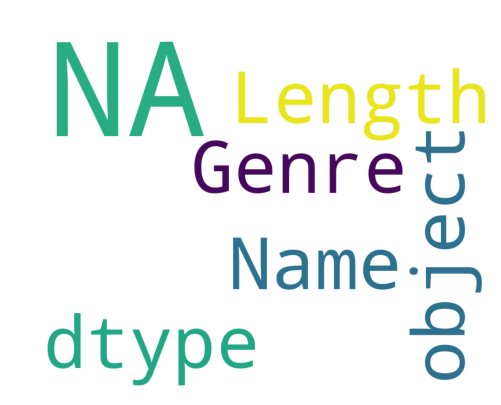

In [46]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text=final_data_df['Genre']
wordcloud = WordCloud(width = 1000, height = 800, background_color ='white', min_font_size = 10).generate(str(text))
plt.figure(figsize = (8, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Finding Predominant Streaming Service**

In [48]:
# Write Your Code here

streaming_service_count=final_data_df['streaming-service'].value_counts().sort_values(ascending=False)
streaming_service_count

streaming-service
NA    200
Name: count, dtype: int64

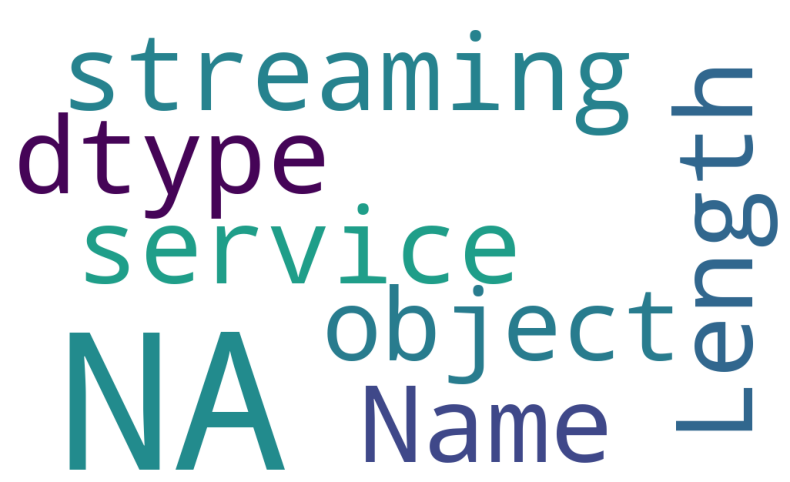

In [49]:
#Let's Visvalize it using word cloud
text=final_data_df['streaming-service']
wordcloud = WordCloud(width = 1000, height = 600, background_color ='white', min_font_size = 10).generate(str(text))
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
final_data_df.to_csv("Final Data.csv")
print("Export Done")

In [ ]:
#saving filter data as Filter Data in csv format
filter_data_df.to_csv("Filter Data.csv")
print("Export Done")

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***